# Step 1: Set Up Kaggle API and Load the Dataset




In [ ]:
from google.colab import files
files.upload()


Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"renadataema","key":"04d9ba89620a479a36fa222bfa3b8146"}'}

In [ ]:
import os
import shutil

# Create a directory for Kaggle API
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# Move and rename the kaggle.json file
shutil.move("kaggle (1).json", os.path.expanduser("~/.kaggle/kaggle.json"))

# Set permissions
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)


In [ ]:
!kaggle datasets download -d anoopjohny/traffic-crashes-crashes


Dataset URL: https://www.kaggle.com/datasets/anoopjohny/traffic-crashes-crashes
License(s): apache-2.0
traffic-crashes-crashes.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

# Extract the dataset
with zipfile.ZipFile('traffic-crashes-crashes.zip', 'r') as zip_ref:
    zip_ref.extractall('traffic_data')

# Load the dataset
import pandas as pd

df = pd.read_csv('traffic_data/Traffic_Crashes_-_Crashes.csv')
df.head()


,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Convert 'CRASH_DATE' to datetime format
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], errors='coerce')

# Check the data types and ensure they are correct
print(df.dtypes)

CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 735350
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         595950
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       23258
CRASH_TYPE                            0
INTERSECTION_RELATED_I           612741
NOT_RIGHT_OF_WAY_I               758229
HIT_AND_RUN_I                    546330
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4


<ipython-input-27-18b925b1277a>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], errors='coerce')


CRASH_RECORD_ID                          object
CRASH_DATE_EST_I                         object
CRASH_DATE                       datetime64[ns]
POSTED_SPEED_LIMIT                        int64
TRAFFIC_CONTROL_DEVICE                   object
DEVICE_CONDITION                         object
WEATHER_CONDITION                        object
LIGHTING_CONDITION                       object
FIRST_CRASH_TYPE                         object
TRAFFICWAY_TYPE                          object
LANE_CNT                                float64
ALIGNMENT                                object
ROADWAY_SURFACE_COND                     object
ROAD_DEFECT                              object
REPORT_TYPE                              object
CRASH_TYPE                               object
INTERSECTION_RELATED_I                   object
NOT_RIGHT_OF_WAY_I                       object
HIT_AND_RUN_I                            object
DAMAGE                                   object
DATE_POLICE_NOTIFIED                    

In [ ]:
# Fill missing values
df.fillna({
    'POSTED_SPEED_LIMIT': df['POSTED_SPEED_LIMIT'].mean(),
    'TRAFFIC_CONTROL_DEVICE': 'NO CONTROLS',  # or most common value
    'WEATHER_CONDITION': 'CLEAR',  # or most common value
    # Add more as necessary for other columns
}, inplace=True)

# Convert categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['TRAFFIC_CONTROL_DEVICE', 'WEATHER_CONDITION', 'LIGHTING_CONDITION'], drop_first=True)

# Select relevant features for modeling
features = df_encoded[['POSTED_SPEED_LIMIT', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'LATITUDE', 'LONGITUDE'] +
                      list(df_encoded.columns[df_encoded.columns.str.startswith('TRAFFIC_CONTROL_DEVICE_')]) +
                      list(df_encoded.columns[df_encoded.columns.str.startswith('WEATHER_CONDITION_')]) +
                      list(df_encoded.columns[df_encoded.columns.str.startswith('LIGHTING_CONDITION_')])]

# Target variable: Number of injuries (you can choose another target based on your analysis)
target = df['INJURIES_TOTAL']  # Assuming INJURIES_TOTAL is a column in the dataset


In [ ]:
# Create a new feature for weekend vs weekday
df['IS_WEEKEND'] = df['CRASH_DAY_OF_WEEK'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

# Include the new feature in the model
features['IS_WEEKEND'] = df['IS_WEEKEND']


<ipython-input-29-a5a4cd99fa1a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['IS_WEEKEND'] = df['IS_WEEKEND']


In [ ]:
# Check for NaN values in the target variable
print(f"NaN values in target variable: {target.isnull().sum()}")


NaN values in target variable: 1741


In [ ]:
# Drop rows where target variable is NaN
df_cleaned = df_encoded.dropna(subset=['INJURIES_TOTAL'])

# Define features and target again
features = df_cleaned[['POSTED_SPEED_LIMIT', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'LATITUDE', 'LONGITUDE'] +
                       list(df_cleaned.columns[df_cleaned.columns.str.startswith('TRAFFIC_CONTROL_DEVICE_')]) +
                       list(df_cleaned.columns[df_cleaned.columns.str.startswith('WEATHER_CONDITION_')]) +
                       list(df_cleaned.columns[df_cleaned.columns.str.startswith('LIGHTING_CONDITION_')])
                      ]
target = df_cleaned['INJURIES_TOTAL']


In [ ]:
# Fill NaN values in the target variable with the mean or median
target.fillna(target.mean(), inplace=True)


<ipython-input-34-e7e9a326053a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.fillna(target.mean(), inplace=True)


In [ ]:
# Split the cleaned dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [ ]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.3409154919474062
R^2 Score: -0.07157954984992432


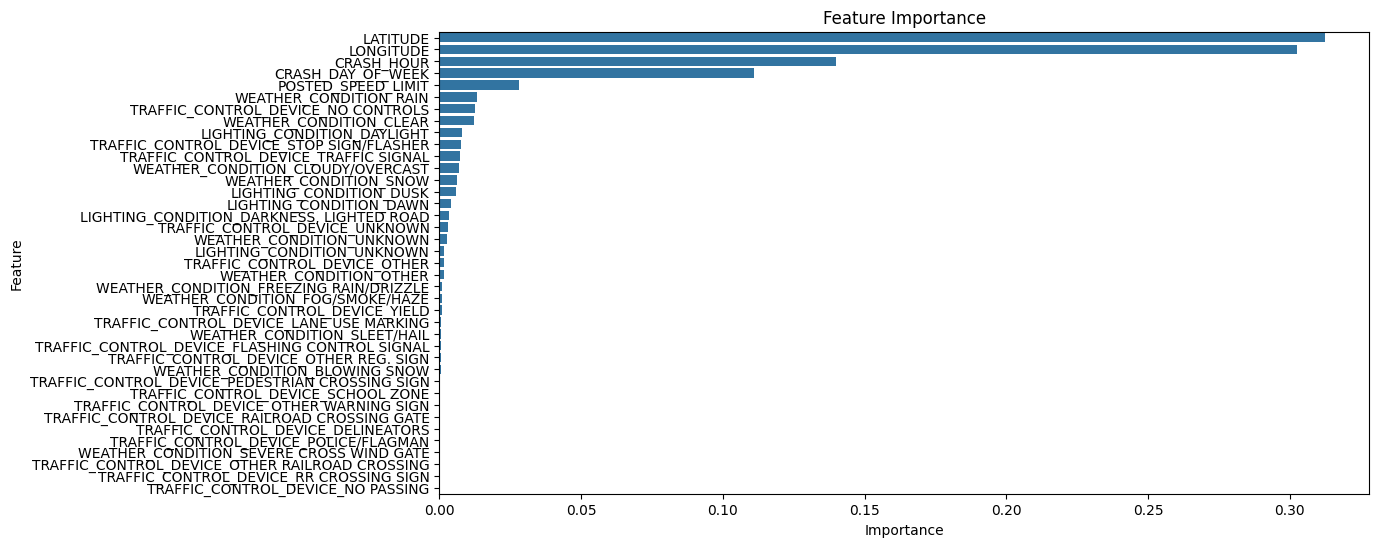

In [ ]:
# Feature importance
importance = model.feature_importances_
feature_names = features.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


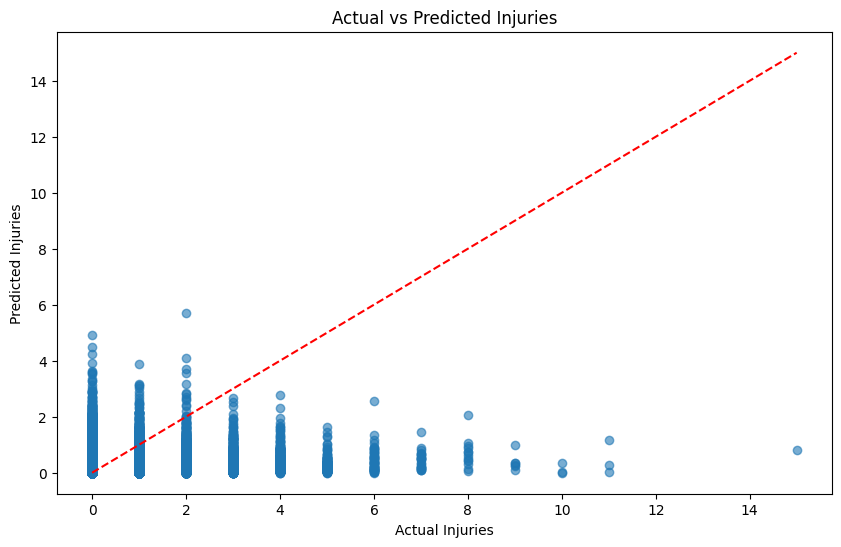

In [ ]:
# Visualize actual vs predicted injuries
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Injuries')
plt.ylabel('Predicted Injuries')
plt.title('Actual vs Predicted Injuries')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # 45-degree line
plt.show()


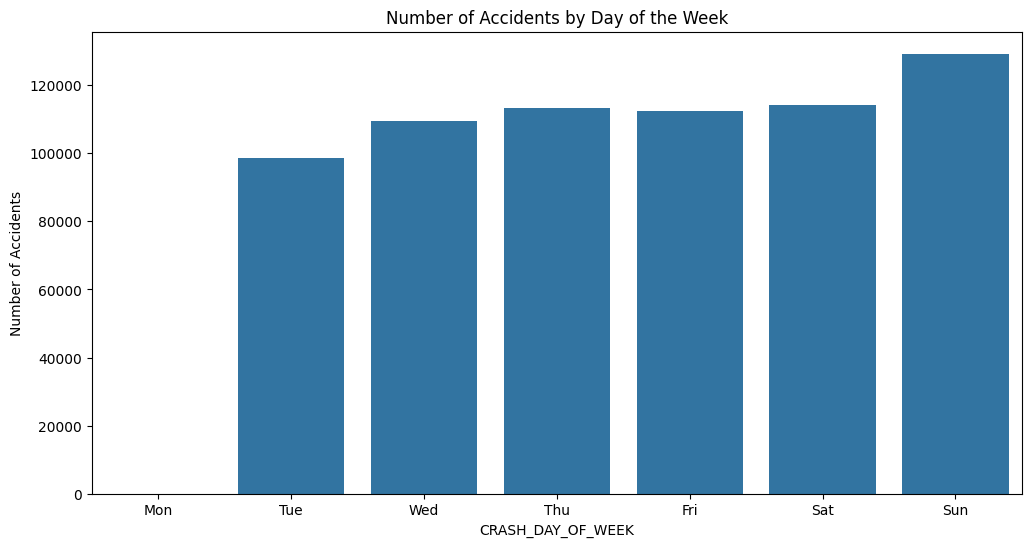

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='CRASH_DAY_OF_WEEK', order=range(7))
plt.title('Number of Accidents by Day of the Week')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Number of Accidents')
plt.show()


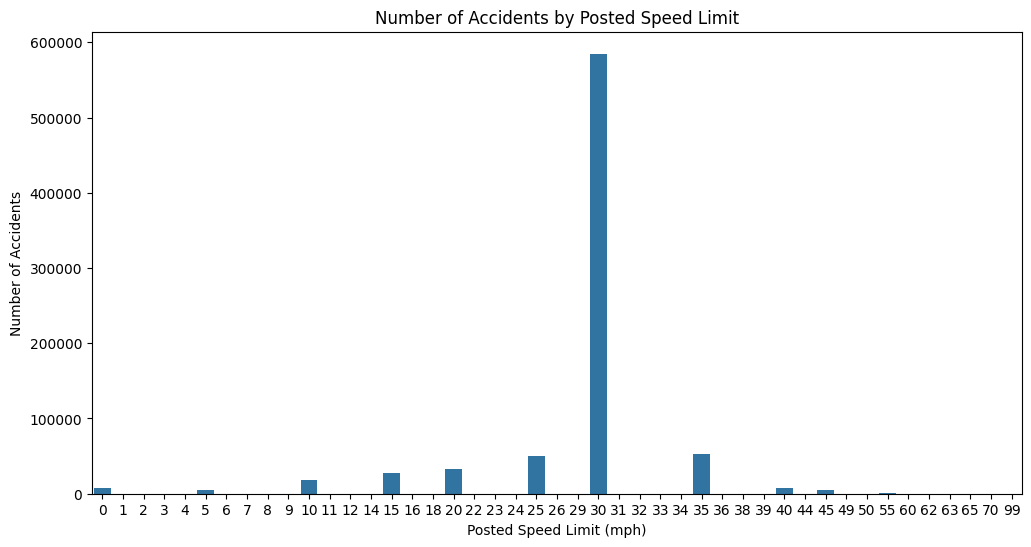

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='POSTED_SPEED_LIMIT')
plt.title('Number of Accidents by Posted Speed Limit')
plt.xlabel('Posted Speed Limit (mph)')
plt.ylabel('Number of Accidents')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


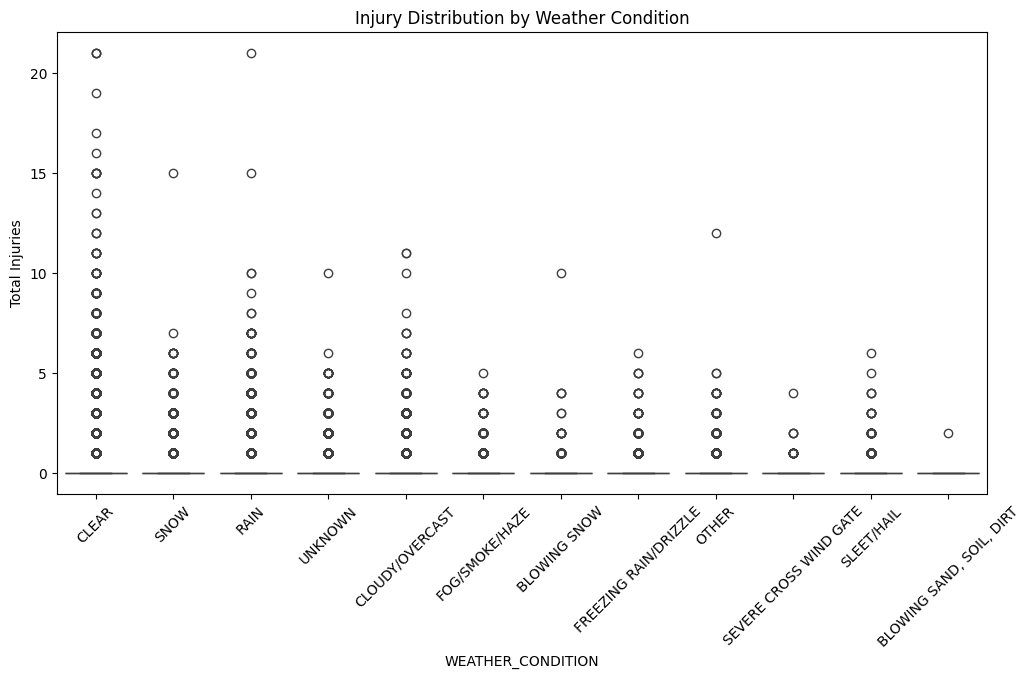

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='WEATHER_CONDITION', y='INJURIES_TOTAL')
plt.title('Injury Distribution by Weather Condition')
plt.xticks(rotation=45)
plt.ylabel('Total Injuries')
plt.show()


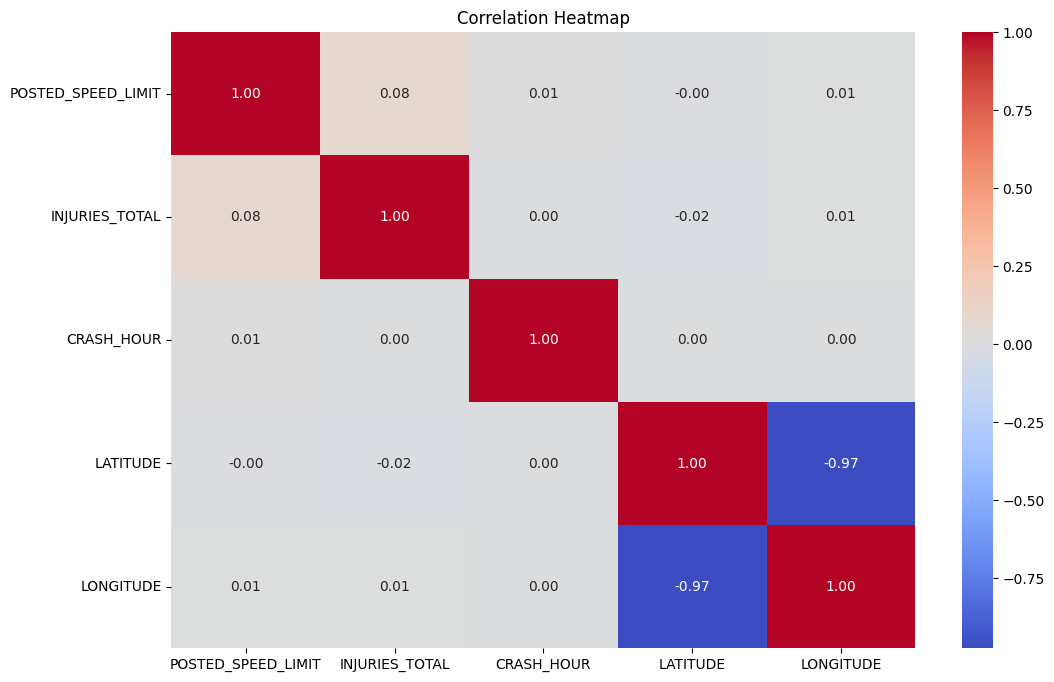

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[['POSTED_SPEED_LIMIT', 'INJURIES_TOTAL', 'CRASH_HOUR', 'LATITUDE', 'LONGITUDE']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


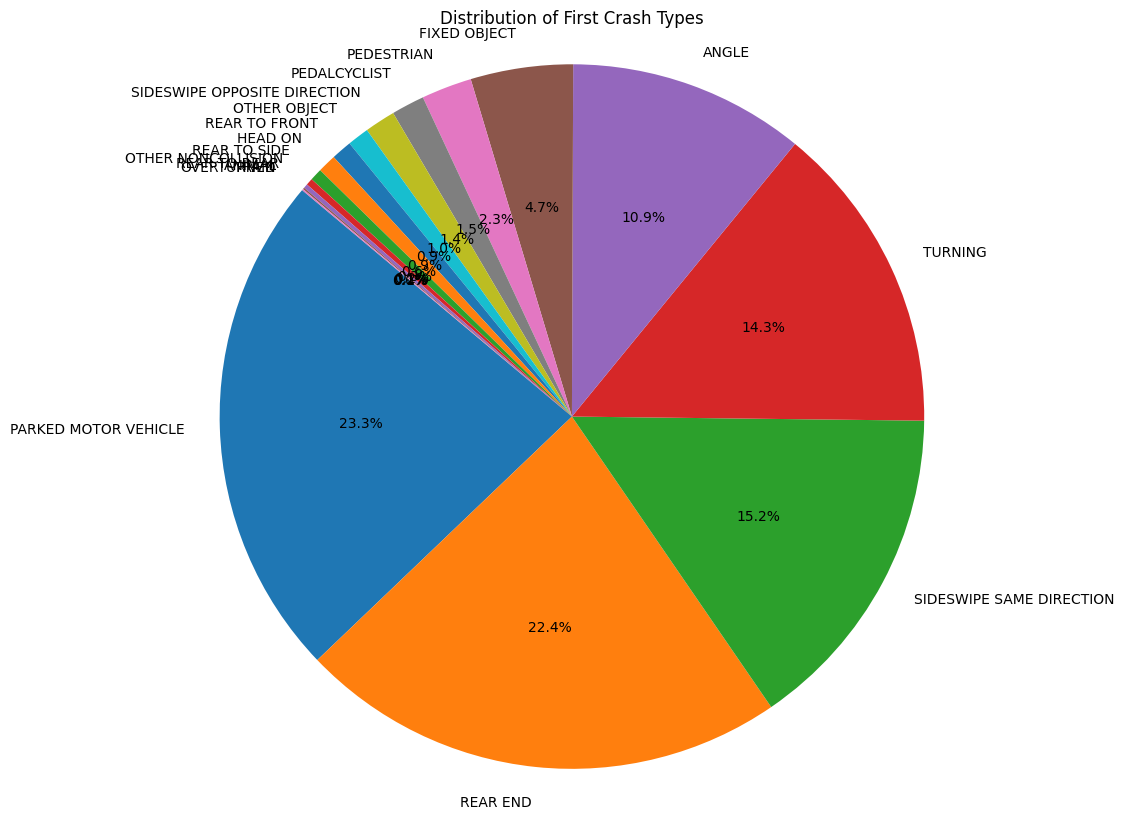

In [ ]:
accident_types = df['FIRST_CRASH_TYPE'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(accident_types, labels=accident_types.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of First Crash Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
